In [50]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotUniform, GlorotNormal
from keras.utils import np_utils
from keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import cv2



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
baseDir = '/content/drive/MyDrive/PADP/StatisticallearningII/Proyecto final/'
NIHCCdata = baseDir + 'CXR8/'
SampleData = baseDir + 'CXR8/samples/'

**Obtener data**

Ver libros :


*   Proyecto_img_load
*   labelsAndSamplePreparation.ipynb



In [4]:
labels = pd.read_csv(SampleData+"sampleLabels.csv")
X = np.load(SampleData+"sampleImg.npy",allow_pickle=True)

In [5]:
X2 = np.load(SampleData+"sampleImg2.npy",allow_pickle=True)

In [6]:
X2.shape

(4999, 256, 256)

In [7]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender
0,00000560_000.png,No Finding,0,560,53,F
1,00000013_039.png,Pneumothorax,17,13,56,M
2,00000013_010.png,Effusion,35,13,60,M
3,00000013_041.png,Emphysema,20,13,56,M
4,00000011_002.png,No Finding,2,11,75,M


In [ ]:
X.shape

(8858,)

In [ ]:
X[1].shape

(256, 256)

In [8]:
label_encoder = LabelEncoder()
y_real = label_encoder.fit_transform(labels['Finding Labels'])
y_real = y_real.reshape(-1, 1)

**Splitting data into test train datasets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_real, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6200,)
(2658,)
(6200, 1)
(2658, 1)


In [ ]:
X_train.shape[0]

6200

In [9]:
Y2 = y_real[0:4999]

In [ ]:
#Preparación de Data para CNN
X_train_cnn = np.reshape(X_train, (X_train.shape[0],1))
#X_test_cnn = np.reshape(X_test, (X_test.shape, 256,256))
X_train_cnn = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
X_test_cnn = X_test.reshape(X_test.shape[0], img_rows, img_cols, channels)

In [10]:
X_train_cnn = X2.reshape(X2.shape[0], 256, 256, 1)

In [ ]:
X_train_cnn.shape

(4999, 256, 256, 1)

In [ ]:
#X_train_cnn = X_train_cnn.astype('float32')
#X_train_cnn = X_train_cnn.astype('float32')

X_train_cnn /= 255
#X_test /= 255

In [ ]:
#X_train_cnn[1][1]

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(256, 256, 1), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=15, activation='softmax'))

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(256, 256, 1), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=15, activation='softmax'))

In [97]:
init = 'glorot_uniform'
reg = l2(0.0005)
chanDim = -1
model = Sequential()
model.add(Conv2D(16, (7, 7), strides=(2, 2), padding="valid",
  kernel_initializer=init, kernel_regularizer=reg,
	input_shape=(256, 256, 1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
		# here we stack two CONV layers on top of each other where
		# each layerswill learn a total of 32 (3x3) filters
model.add(Conv2D(32, (3, 3), padding="same",
  kernel_initializer=init, kernel_regularizer=reg,activation="relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))
	
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
  kernel_initializer=init, kernel_regularizer=reg,activation="relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_initializer=init,activation="relu"))
model.add(BatchNormalization())
		# softmax classifier
model.add(Dense(15,activation='softmax'))


In [98]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
history2 = model.fit(X_train_cnn, Y2, epochs=10, batch_size=64)

Epoch 1/10
79/79 [==============================] - 138s 2s/step - loss: 2.5448 - accuracy: 0.3837
Epoch 2/10
79/79 [==============================] - 138s 2s/step - loss: 1.7169 - accuracy: 0.5363
Epoch 3/10
79/79 [==============================] - 135s 2s/step - loss: 1.6146 - accuracy: 0.5493
Epoch 4/10
79/79 [==============================] - 136s 2s/step - loss: 1.4533 - accuracy: 0.5765
Epoch 5/10
79/79 [==============================] - 135s 2s/step - loss: 1.4732 - accuracy: 0.5711
Epoch 6/10
79/79 [==============================] - 134s 2s/step - loss: 1.2524 - accuracy: 0.6191
Epoch 7/10
79/79 [==============================] - 133s 2s/step - loss: 0.9832 - accuracy: 0.6961
Epoch 8/10
79/79 [==============================] - 136s 2s/step - loss: 0.7494 - accuracy: 0.7664
Epoch 9/10
79/79 [==============================] - 137s 2s/step - loss: 0.6158 - accuracy: 0.8120
Epoch 10/10
79/79 [==============================] - 136s 2s/step - loss: 0.3773 - accuracy: 0.8930


In [100]:
model.save(baseDir+'CXR8/models/cnn5.h5')

In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train_cnn, Y2, epochs=10, batch_size=64)

Epoch 1/10
79/79 [==============================] - 649s 8s/step - loss: 80.5247 - accuracy: 0.4801
Epoch 2/10
79/79 [==============================] - 635s 8s/step - loss: 1.8386 - accuracy: 0.5417
Epoch 3/10
79/79 [==============================] - 645s 8s/step - loss: 1.6719 - accuracy: 0.5539
Epoch 4/10
79/79 [==============================] - 634s 8s/step - loss: 1.4325 - accuracy: 0.6071
Epoch 5/10
79/79 [==============================] - 633s 8s/step - loss: 1.1468 - accuracy: 0.6715
Epoch 6/10
79/79 [==============================] - 642s 8s/step - loss: 0.9189 - accuracy: 0.7309
Epoch 7/10
79/79 [==============================] - 638s 8s/step - loss: 0.7235 - accuracy: 0.7900
Epoch 8/10
79/79 [==============================] - 639s 8s/step - loss: 0.5916 - accuracy: 0.8232
Epoch 9/10
79/79 [==============================] - 644s 8s/step - loss: 0.5010 - accuracy: 0.8564
Epoch 10/10
79/79 [==============================] - 633s 8s/step - loss: 0.4051 - accuracy: 0.8808


In [ ]:
cnn.save(baseDir+'CXR8/models/cnn2.h5')

In [101]:
predicsts = cnn.predict(X_train_cnn)

NameError: ignored

In [ ]:
predict_val = np.argmax(predicsts, axis=1)
predict_val

array([10, 10, 10, ..., 10, 10, 10])

In [102]:
predicsts = model.predict(X_train_cnn)

In [103]:
predict_val = np.argmax(predicsts, axis=1)
predict_val

array([10, 14,  4, ..., 10, 10, 10])

In [ ]:
Y2

array([[10],
       [14],
       [ 4],
       ...,
       [ 0],
       [ 4],
       [10]])

In [104]:
cnn_score = accuracy_score(Y2, predict_val)

In [105]:
print(cnn_score)

0.6325265053010602


In [106]:
print(history2.history['accuracy'])

[0.3836767375469208, 0.5363072752952576, 0.5493098497390747, 0.5765153169631958, 0.5711142420768738, 0.6191238164901733, 0.6961392164230347, 0.7663532495498657, 0.811962366104126, 0.8929786086082458]


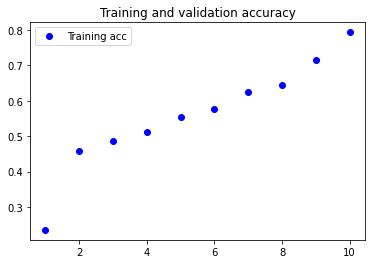

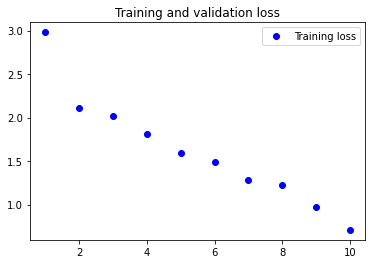

In [39]:
acc = history2.history['accuracy']
#val_acc = history2.history['val_acc']
loss = history2.history['loss']
#val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

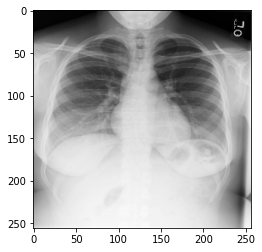

(256, 256)


In [62]:
imgN = labels['Image Index'][500]
img_path = baseDir+'CXR8/images/images_resize/'+imgN
#img = image.load_img(img_path, target_size=(256, 256))
#img_tensor = image.img_to_array(img)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor /= 255.
imgC = cv2.imread(baseDir+'CXR8/images/images_resize/'+imgN,-1)
plt.imshow(imgC, cmap="gray")

#plt.imshow(img_tensor[0])
plt.show()
#print(img_tensor.shape)
print(imgC.shape)
#imgC.reshape(256,256,1)

In [76]:
imgC = imgC.reshape(1,256,256,1)
#np.expand_dims(imgC, axis=0).shape
#images = np.vstack([x])
#images.shape


In [77]:
imgC.shape

(1, 256, 256, 1)

In [88]:
model.layers[:11]

In [72]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [79]:
activations = activation_model.predict(imgC) # Returns a list of five Numpy arrays: one array per layer activation


In [80]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 125, 125, 16)


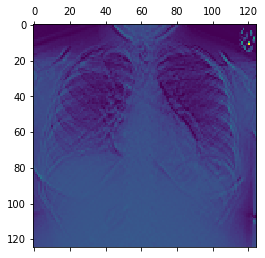

In [81]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


MemoryError: ignored

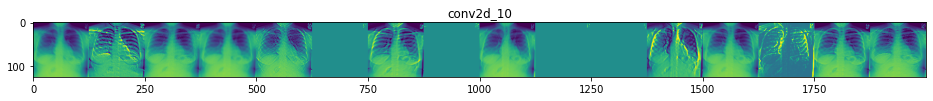

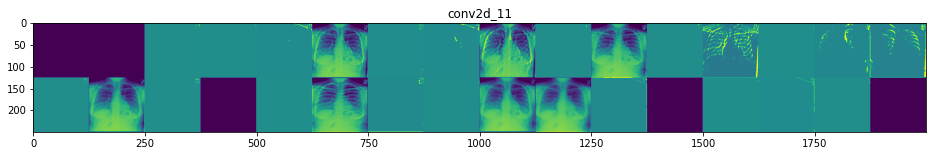

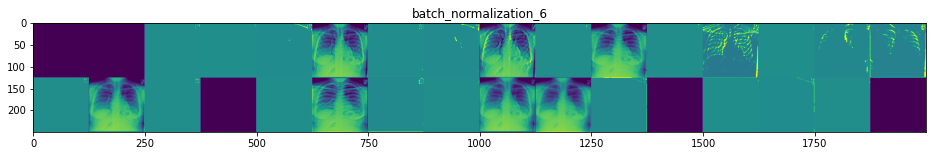

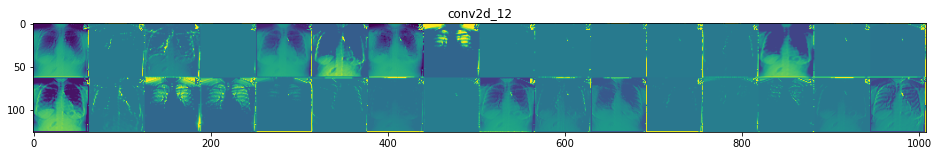

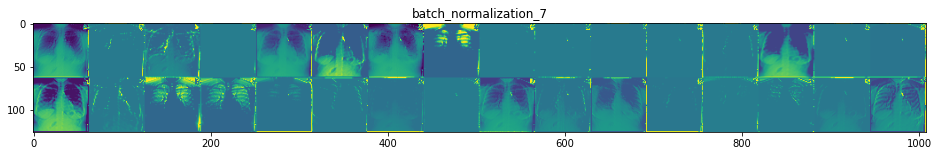

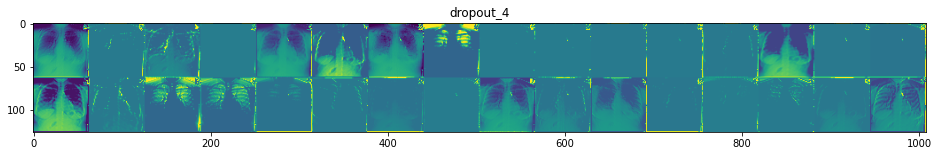

In [89]:
layer_names = []
for layer in model.layers[:11]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [114]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (256, 256, 1), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(BatchNormalization(axis=chanDim))
classifier.add(Dropout(0.5)) # antes era 0.25


# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(BatchNormalization(axis=chanDim))
classifier.add(Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 15, activation = 'softmax'))

In [115]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history4 = classifier.fit(X_train_cnn, Y2, epochs=10, batch_size=64)

Epoch 1/10
